In [1]:
using CBFToolbox

In [2]:
n = 4
m = 2
f(x) = [x[3], x[4], 0.0, 0.0]
g(x) = [0.0 0.0; 0.0 0.0; 1.0 0.0; 0.0 1.0]
Σ = ControlAffineSystem(n, m, f, g)

ControlAffineSystem(4, 2, f, g, [0.0, 0.0, 0.0, 0.0], missing, missing)

In [3]:
P = [2.0 0.0 1.0 0.0; 0.0 2.0 0.0 1.0; 1.0 0.0 1.0 0.0; 0.0 1.0 0.0 1.0]
V(x) = x'P * x
γ(s) = 0.5s
CLF = ControlLyapunovFunction(V, γ)
κCLF = CLFQP(Σ, CLF)

CLFQP(CBFToolbox.var"#control#18"{ControlAffineSystem, ControlLyapunovFunction}(ControlAffineSystem(4, 2, f, g, [0.0, 0.0, 0.0, 0.0], missing, missing), ControlLyapunovFunction(V, CBFToolbox.var"#∇V#16"{typeof(V)}(V), γ)))

In [4]:
O = CircularObstacle([-1.0, 1.0], 0.3)
α(s) = s^3
CBF = ControlBarrierFunction(O, α)
HOCBF = HighOrderCBF(CBF, Σ, 2)

HighOrderCBF(CBFToolbox.var"#ψ1#72"{ControlBarrierFunction, ControlAffineSystem}(ControlBarrierFunction(CBFToolbox.var"#h#116"{CircularObstacle}(CircularObstacle([-1.0, 1.0], 0.3)), CBFToolbox.var"#∇h#26"{CBFToolbox.var"#h#116"{CircularObstacle}}(CBFToolbox.var"#h#116"{CircularObstacle}(CircularObstacle([-1.0, 1.0], 0.3))), α), ControlAffineSystem(4, 2, f, g, [0.0, 0.0, 0.0, 0.0], missing, missing)), CBFToolbox.var"#∇ψ1#73"{ControlBarrierFunction, ControlAffineSystem, CBFToolbox.var"#dα#71"{ControlBarrierFunction}, CBFToolbox.var"#dh2dx2#70"{ControlBarrierFunction}, CBFToolbox.var"#dfdx#69"{ControlAffineSystem}}(ControlBarrierFunction(CBFToolbox.var"#h#116"{CircularObstacle}(CircularObstacle([-1.0, 1.0], 0.3)), CBFToolbox.var"#∇h#26"{CBFToolbox.var"#h#116"{CircularObstacle}}(CBFToolbox.var"#h#116"{CircularObstacle}(CircularObstacle([-1.0, 1.0], 0.3))), α), ControlAffineSystem(4, 2, f, g, [0.0, 0.0, 0.0, 0.0], missing, missing), CBFToolbox.var"#dα#71"{ControlBarrierFunction}(ControlBarr

In [5]:
κ = CBFQP(Σ, HOCBF, κCLF)

CBFQP(CBFToolbox.var"#control#87"{ControlAffineSystem, HighOrderCBF, CLFQP}(ControlAffineSystem(4, 2, f, g, [0.0, 0.0, 0.0, 0.0], missing, missing), HighOrderCBF(CBFToolbox.var"#ψ1#72"{ControlBarrierFunction, ControlAffineSystem}(ControlBarrierFunction(CBFToolbox.var"#h#116"{CircularObstacle}(CircularObstacle([-1.0, 1.0], 0.3)), CBFToolbox.var"#∇h#26"{CBFToolbox.var"#h#116"{CircularObstacle}}(CBFToolbox.var"#h#116"{CircularObstacle}(CircularObstacle([-1.0, 1.0], 0.3))), α), ControlAffineSystem(4, 2, f, g, [0.0, 0.0, 0.0, 0.0], missing, missing)), CBFToolbox.var"#∇ψ1#73"{ControlBarrierFunction, ControlAffineSystem, CBFToolbox.var"#dα#71"{ControlBarrierFunction}, CBFToolbox.var"#dh2dx2#70"{ControlBarrierFunction}, CBFToolbox.var"#dfdx#69"{ControlAffineSystem}}(ControlBarrierFunction(CBFToolbox.var"#h#116"{CircularObstacle}(CircularObstacle([-1.0, 1.0], 0.3)), CBFToolbox.var"#∇h#26"{CBFToolbox.var"#h#116"{CircularObstacle}}(CBFToolbox.var"#h#116"{CircularObstacle}(CircularObstacle([-1.0, 

In [6]:
tf = 20.0
sim = Simulation(tf)

Simulation(0.0, 20.0, 0.01, 0.0:0.01:20.0)

In [7]:
Σ.x0 = [-2.2, 2.0, 0.0, 0.0]
sim(Σ, κ)

ControlAffineSystem(4, 2, f, g, [-2.2, 2.0, 0.0, 0.0], [0.032342654487096605, -0.031970647300567485, 0.013151707823578699, 0.029320476588803306], [-2.2 -2.1999450002152035 … 0.03221001462480387 0.032342654487096605; 2.0 1.9999500001833623 … -0.032263779216029236 -0.031970647300567485; 0.0 0.010999956959326679 … 0.013376264634968589 0.013151707823578699; 0.0 -0.009999963327503525 … 0.029305906503546867 0.029320476588803306])

In [8]:
using Plots
using LaTeXStrings
gr()
latexify_plots()

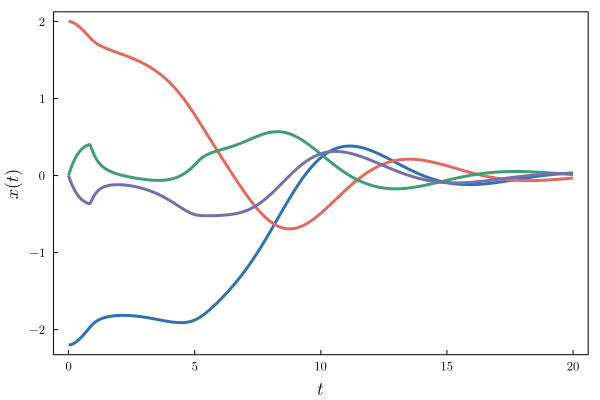

In [9]:
plot(; xlabel=L"t", ylabel=L"x(t)")
plot!(sim.ts, Σ.xs')

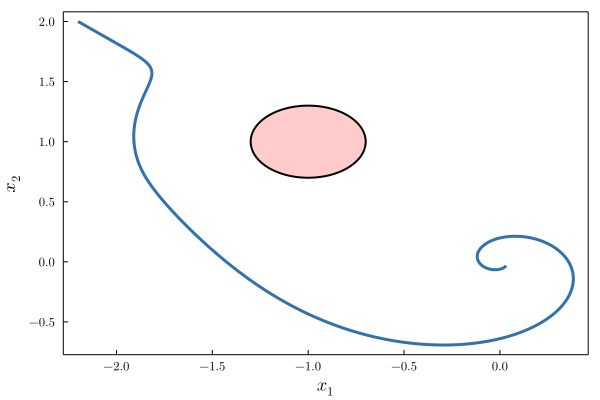

In [10]:
plot(Σ.xs[1, :], Σ.xs[2, :]; xlabel=L"x_1", ylabel=L"x_2")
plot!(
    circle_shape(O);
    seriestype=[:shape],
    fillcolor=:red,
    fillalpha=0.2,
    linecolor=:black,
    lw=2,
    edgecolor=:black,
    label="",
)